<a href="https://colab.research.google.com/github/ulti72/KMClustering/blob/master/KMClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Uploading kaggle.json from kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ulti72","key":"48282a59b3c253605adb3ce5aa7ad10a"}'}

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#Downloading dataset from kaggle.
!kaggle datasets download -d moltean/fruits 

 98% 697M/709M [00:08<00:00, 99.5MB/s]
100% 709M/709M [00:08<00:00, 84.9MB/s]


In [0]:
# Unzip the data
!unzip fruits.zip

In [0]:
#importing modules
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [0]:
name=[] #for storing path of our data
#Storing path of images from training and test folder
import os
      
for dirname, _, filenames in os.walk('/content/fruits-360/Training'):
    for filename in filenames:
        name.append(os.path.join(dirname,filename))

for dirname, _, filenames in os.walk('/content/fruits-360/Test'):
    for filename in filenames:
        name.append(os.path.join(dirname,filename))
   

In [21]:
#total data
len(name)

76824

In [0]:
# Display two images two compare original image and processed image
def display(a, b, title1 = "Original", title2 = "Processed"):
    a= cv2.imread(a)
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()


In [0]:
# Preprocessing: removing noise and storing image in "train" array
train=[]
def processing(data):
    
    #reading image
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data]
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(img)):
        blur = cv2.GaussianBlur(img[i], (5, 5), 0)
        no_noise.append(blur)
        image = no_noise[i]
        train.append(image)

In [0]:
#Preprocessing and putting data into np array...
processing(name)
train = np.array(train)

In [32]:
#76824 training data with 100x100 resolution and 3 is RGB values for each pixel
train.shape

(76824, 100, 100, 3)

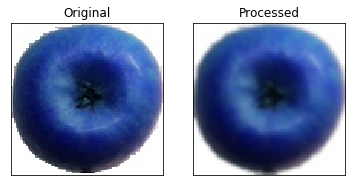

In [36]:
#Original data vs Processed data
display(name[1432],train[1432])
